# <span style="font-family: 'Brush Script MT'; font-size: 100px; color: rgba(255, 0, 0, 0.7)">Capstone Project</span>

<div style="text-align: center; font-family: 'Comic Sans MS'; font-size: 40px; color: rgb(1, 77, 78); font-style: italic;">Restaurant Recommender System</div>

<div style="text-align: right; font-family: 'Comic Sans MS'; color: rgba(255, 0, 0, 0.7)"">By Lim Zi Ming</div>

![](images/tokyo_res2.jpg)

## ***<u>Background:</u>***

In the age of global connectivity, dining has transcended beyond a mere need for sustenance, evolving into a rich tapestry of cultural exploration and personal indulgence. The world, with its vast culinary offerings, has transformed into a boundless menu, leaving diners both excited and overwhelmed. As people seek to satiate not just their hunger but also their desire for unique experiences, the importance of making the right dining choice becomes paramount. The rise of international cuisines and the intermingling of food cultures have further diversified the gastronomic landscape. In such a scenario, the need for a tailored guide, one that aligns with individual tastes and preferences, is more pressing than ever.

However, the proliferation of choices, coupled with the myriad of factors influencing a dining decision – from dietary preferences to budget considerations and ambiance desires – complicates the selection process. The quest for the ultimate dining experience becomes a complex problem, necessitating a solution that goes beyond traditional listing and rating systems.

## ***<u>Problem Statement:</u>***

In today's digitalized gastronomic landscape, where choices are numerous and diverse, there's an evident discrepancy between the abundance of restaurant options and the quality of personalized recommendations provided to diners. As the culinary industry grows and diversifies, the conventional methods of selecting a dining venue based on mere reviews or ratings no longer suffice. There is a clear and pressing need for a system that offers recommendations tailored to the individual preferences of each diner.

**Business Objective**: Our primary business goal is to enhance the dining experience of our users by streamlining their decision-making process. By doing so, we aim to increase user engagement on our platform, foster customer loyalty, and position ourselves as the go-to guide for personalized dining recommendations.

**User Needs**: Preliminary research indicates that our users are seeking:

1. **Personalization**: Recommendations that align with their unique tastes, dietary restrictions, and past dining experiences.
2. **Location-based Suggestions**: Recommendations based on their current location or proximity to specific landmarks, such as train stations.
3. **Diverse Cuisine Options**: Suggestions that introduce them to new culinary genres while aligning with their known preferences.
4. **Quality Assurance**: Recommendations that not only match their taste but also assure a quality dining experience, as indicated by ratings and reviews.

In light of these findings, our challenge is to design a recommendation system that seamlessly integrates these user needs while aligning with our overarching business objectives. The system should be adept at navigating the vast array of dining establishments and distilling them into tailored suggestions, ensuring every user finds their perfect dining match.

## ***<u>Project Methodology:</u>***

**Objective**: To develop a content-based recommender system that aids diners in making informed dining decisions by providing personalized restaurant recommendations based on genres, proximity to selected train stations, ratings, and precise location coordinates.

**1. Data Acquisition**:

- **Source Data**: For this project, our primary dataset was acquired from Kaggle.com. The dataset consists of aggregated data on restaurants in Japanese scraped from Tabelog.com, capturing essential and authentic details such as genres, ratings, addresses, and proximity to specific train stations. 

- **About Tabelog**: Tabelog is one of Japan's premier restaurant review websites, where locals and tourists alike share their dining experiences. It offers a comprehensive look into the gastronomic scene of the country, from small izakayas and ramen shops to high-end sushi establishments. Ratings and reviews on Tabelog are considered highly trustworthy, as they are predominantly user-generated and reflect genuine customer experiences. Our dataset incorporates these valuable insights, providing a holistic view of the restaurant scene. 
  
**2. Data Pre-processing**:
- Cleanse the data to remove any inconsistencies, duplicates, or inaccuracies.
- Extract and process features like genres to prepare them for the recommendation algorithm.
- Translate Japanese content on `name`, `genre` and `nearest_station` to English to ensure uniformity and comprehensibility.

**3. Content Representation**:
- Utilize the genre of each restaurant to form its content profile. For example, a restaurant offering Italian and Seafood would have these genres as key features in its profile.
  
**4. Similarity Computation**:
- Use cosine similarity to measure the likeness between different restaurants based on their content profiles. This metric helps in determining how closely aligned two restaurants are in terms of their offerings.
  
**5. Recommendation Engine**:
- Given user preferences (e.g., preferred genres, selected train station), the system would identify restaurants that closely match the profile using the computed similarity scores.
- Sort the recommended restaurants based on their ratings, ensuring that users get suggestions that are not only aligned with their preferences but also are of high quality.
  
**6. Location-based Recommendations**:
- Provide precise geocoordinates for each recommended restaurant, enabling users to easily locate them. This ensures that diners are not just informed about what to eat but also where to eat.

**7. Deployment**:
- Integrate the recommender system into a user-friendly interface, StreamLit. This will allow users to effortlessly input their preferences and receive tailored restaurant recommendations in real-time.

Through this structured approach, the project aims to revolutionize the dining decision-making process, ensuring that every meal is not just a dish but an experience, perfectly curated to the diner's desires.

In [1]:
# import libraries
import pandas as pd    
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import pickle

## Initial Data Exploration and Cleaning

Upon sourcing the data from Kaggle, which aggregates reviews from the esteemed restaurant review platform, Tabelog, it's essential first to familiarize ourselves with its structure and contents. This will enable us to identify any potential issues or modifications needed to streamline our analysis and make our recommendation system more effective.

In [2]:
# Loading the dataset
restaurants = pd.read_csv('data/Tokyo_Restaurant_Reviews_Tabelog.csv')
display(restaurants)

,store_id,name,nearest_station,nearest_distance,genre,rating_val,review_cnt,save_cnt,budget_dinner,budget_lunch,holiday,address,prefecture,municipalities_1,municipalities_2,municipalities_3
0,13097553,個室北国炉端 ときしらず 飯田橋駅前,飯田橋駅,82.0,魚介料理・海鮮料理、居酒屋、日本料理,3.12,61.0,2848.0,"￥3,000～￥3,999","￥3,000～￥3,999",-,東京都千代田区飯田橋4-9-8 大和ビル 5F,東京,千代田区,飯田橋,-
1,13115133,祭 飯田橋東口駅前,飯田橋駅,65.0,居酒屋、和食（その他）、焼鳥,3.25,29.0,1358.0,"￥2,000～￥2,999",-,-,東京都千代田区飯田橋4-9-8 飯田橋プラザ 1F,東京,千代田区,飯田橋,-
2,13139364,鳥酎 飯田橋,飯田橋駅,190.0,焼鳥、居酒屋、日本酒バー,3.46,119.0,10893.0,"￥3,000～￥3,999",～￥999,-,東京都千代田区飯田橋4-7-11 カクタス飯田橋 B1F,東京,千代田区,飯田橋,-
3,13260247,炭火焼き鳥 すいけん 飯田橋,飯田橋駅,307.0,居酒屋、焼鳥、日本酒バー,3.06,14.0,725.0,"￥2,000～￥2,999","￥1,000～￥1,999",-,東京都千代田区飯田橋3-3-7 秋穂セントラルビル 1-B,東京,千代田区,飯田橋,-
4,13225614,個室居酒屋×博多焼き鳥 巻きの助 飯田橋店,飯田橋駅,259.0,居酒屋、焼鳥、もつ鍋,3.07,35.0,2475.0,"￥3,000～￥3,999",-,-,東京都千代田区飯田橋4-5-6 ECS第3ビル 1F,東京,千代田区,飯田橋,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125917,13269978,88 cafe,-,NaN,カフェ,3.03,2.0,13.0,-,-,-,東京都小笠原村母島字静沢,東京,小笠原村,母島,-
125918,13245445,お食事処 めぐろ,-,NaN,居酒屋・ダイニングバー（その他）、定食・食堂,3.05,3.0,31.0,"￥4,000～￥4,999",-,-,東京都小笠原村母島,東京,小笠原村,母島,-
125919,13272172,アンナビーチ母島ユースホステル,-,NaN,その他,NaN,NaN,1.0,-,-,-,東京都小笠原村母島静沢,東京,小笠原村,母島,-
125920,13272155,アイランドリゾート母島 ナンプー,-,NaN,旅館,NaN,NaN,3.0,-,-,-,東京都小笠原村母島字元地,東京,小笠原村,母島,-


## Checking and Handling Duplicate Entries

Duplicate entries can skew analysis results and may lead to biased recommendations. We will check for duplicates based on the 'store_id' and 'name' columns only to ensure every restaurant is uniquely represented.

In [3]:
restaurants['prefecture'].unique()

array(['東京'], dtype=object)

In [4]:
# Check for duplicates based on 'store_id'
has_duplicates = restaurants.duplicated(subset='store_id').any()

# Print the result
if has_duplicates:
    print("The dataset contains duplicate entries based on 'store_id'.")
else:
    print("The dataset does not contain duplicate entries based on 'store_id'.")

The dataset does not contain duplicate entries based on 'store_id'.


In [5]:
# Check for duplicates based on 'name'
duplicate_names = restaurants[restaurants.duplicated(subset='name', keep=False)]

# If there are duplicates, display them for inspection
if not duplicate_names.empty:
    display(duplicate_names.sort_values(by='name'))

,store_id,name,nearest_station,nearest_distance,genre,rating_val,review_cnt,save_cnt,budget_dinner,budget_lunch,holiday,address,prefecture,municipalities_1,municipalities_2,municipalities_3
41525,13255871,108,両国駅,616.0,バー,NaN,NaN,33.0,-,-,土曜日,東京都墨田区緑2-17 YKビル 1F,東京,墨田区,緑,-
56940,13136786,108,羽田空港第３ターミナル（東京モノレール）駅,210.0,カフェ、サンドイッチ、洋菓子（その他）,3.21,15.0,66.0,～￥999,～￥999,年中無休,東京都大田区羽田空港2-6-5 羽田空港国際線ビル,東京,大田区,羽田空港,-
118615,13174896,13,平山城址公園駅,29.0,居酒屋,3.02,1.0,10.0,"￥1,000～￥1,999",-,-,東京都日野市平山5-27-8,東京,日野市,平山,-
75362,13248075,13,阿佐ケ谷駅,982.0,カレーライス、カレー（その他）,3.14,20.0,668.0,-,～￥999,水曜日,東京都杉並区阿佐谷北4-25-13,東京,杉並区,阿佐谷北,-
37449,13190736,298,新御徒町駅,247.0,洋食・欧風料理（その他）,3.02,3.0,22.0,"￥2,000～￥2,999",-,-,東京都台東区台東3-30-11 誠ビル 1F,東京,台東区,台東,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16191,13061763,龍門,三田駅,173.0,中華料理,3.28,73.0,1461.0,～￥999,～￥999,土曜日,東京都港区芝5-26-4,東京,港区,芝,-
107135,13131157,龍鳳,西武立川駅,402.0,中華料理、ラーメン,3.09,10.0,71.0,～￥999,～￥999,毎週月曜日 旧正月,東京都立川市一番町2-35,東京,立川市,一番町,-
29009,13042665,龍鳳,新宿駅,94.0,中華料理、餃子,3.23,56.0,533.0,"￥3,000～￥3,999",-,無休,東京都新宿区西新宿1-1-4 京王百貨店新宿店 8F,東京,新宿区,西新宿,-
49600,13062101,龍鳳,大森駅,143.0,中華料理、中華麺（その他）、餃子,3.26,26.0,405.0,-,～￥999,日曜日,東京都品川区南大井6-24-14,東京,品川区,南大井,-


Given that 'store_id' does not contain duplicates, we can confirm that the dataset is unique at the restaurant level and each entry represents a distinct dining establishment. This ensures data integrity and avoids potential redundancies during analysis and recommendation. 

It's important to mention that some restaurant names might appear in numeric form, as this could genuinely be their designated name. Furthermore, the presence of duplicate restaurant names doesn't necessarily indicate data redundancy, instead, it can suggest that these restaurants are part of a chain or franchise.

## Handling Missing or Undefined Values

In many datasets, it's not uncommon to encounter missing or undefined values. Such values can hinder data analysis and machine learning processes. We will replace ambiguous '-' signs with 'None' to clearly indicate missing data and then inspect the dataset's structure and non-null count for each column.

In [6]:
restaurants = restaurants.replace('-', None)
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125922 entries, 0 to 125921
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   store_id          125922 non-null  int64  
 1   name              125922 non-null  object 
 2   nearest_station   119003 non-null  object 
 3   nearest_distance  119003 non-null  float64
 4   genre             125922 non-null  object 
 5   rating_val        108694 non-null  float64
 6   review_cnt        115972 non-null  float64
 7   save_cnt          125085 non-null  float64
 8   budget_dinner     85220 non-null   object 
 9   budget_lunch      79341 non-null   object 
 10  holiday           79988 non-null   object 
 11  address           125922 non-null  object 
 12  prefecture        125922 non-null  object 
 13  municipalities_1  125922 non-null  object 
 14  municipalities_2  125922 non-null  object 
 15  municipalities_3  0 non-null       object 
dtypes: float64(4), int64

## Dropping Irrelevant Columns and Handling Null Values

Certain columns which too many Nulls do not contribute to our recommendation system and can thus be removed. Moreover, rows with critical missing data, especially in the 'rating_val' column, can skew our recommendations and are therefore omitted.

In [7]:
restaurants = restaurants.drop(columns=['prefecture', 'holiday', 'municipalities_3'])
restaurants = restaurants.dropna(subset=['rating_val'])

## Price Range Categorization

Even though we'll not be using price range for our recommender system, it's more intuitive to categorize restaurants into broad price ranges rather than work with numerous specific price brackets. We'll categorize them into 'cheap', 'average', and 'expensive', making the data more digestible and user-friendly.

In [8]:
restaurants['budget_dinner'].unique()

array(['￥3,000～￥3,999', '￥2,000～￥2,999', '￥4,000～￥4,999', '￥8,000～￥9,999',
       '￥6,000～￥7,999', '￥1,000～￥1,999', '￥5,000～￥5,999', '～￥999',
       '￥10,000～￥14,999', None, '￥30,000～￥39,999', '￥40,000～￥49,999',
       '￥15,000～￥19,999', '￥20,000～￥29,999', '￥100,000～',
       '￥60,000～￥79,999', '￥80,000～￥99,999', '￥50,000～￥59,999'],
      dtype=object)

In [9]:
restaurants['budget_lunch'].unique()

array(['￥3,000～￥3,999', None, '～￥999', '￥1,000～￥1,999', '￥2,000～￥2,999',
       '￥6,000～￥7,999', '￥8,000～￥9,999', '￥10,000～￥14,999',
       '￥4,000～￥4,999', '￥20,000～￥29,999', '￥5,000～￥5,999',
       '￥30,000～￥39,999', '￥60,000～￥79,999', '￥15,000～￥19,999',
       '￥80,000～￥99,999', '￥50,000～￥59,999', '￥40,000～￥49,999',
       '￥100,000～'], dtype=object)

In [10]:
def price_to_label(price_range):
    if price_range in ['～￥999', '￥1,000～￥1,999', '￥2,000～￥2,999']:
        return 'cheap'
    elif price_range in ['￥3,000～￥3,999', '￥4,000～￥4,999', '￥5,000～￥5,999']:
        return 'average'
    elif price_range is None:  # Handle None values and change them to 'others'
        return 'unknown'
    else:
        return 'expensive'

restaurants['budget_dinner'] = restaurants['budget_dinner'].apply(price_to_label)
restaurants['budget_lunch'] = restaurants['budget_lunch'].apply(price_to_label)

#Double confirming that all price range are converted
print(restaurants['budget_dinner'].unique())
print(restaurants['budget_lunch'].unique())

['average' 'cheap' 'expensive' 'unknown']
['average' 'unknown' 'cheap' 'expensive']


## Filling Missing Values in Review and Save Counts

It's reasonable to assume that if the review count or save count is missing, it could indicate that there were no reviews or saves. Thus, we'll fill these with zeros. We'll also remove any entries with missing station data as this is crucial for our location-based recommendations.

In [11]:
restaurants['review_cnt'].fillna(0, inplace=True)
restaurants['save_cnt'].fillna(0, inplace=True)
restaurants = restaurants.dropna(subset=['nearest_station', 'nearest_distance'])

# Sort by 'rating_val' in descending order and take the top 10000 rows
# Reducing data size due to Github & StreamLit's constraints
restaurants = restaurants.sort_values(by='rating_val', ascending=False).head(10000)
display(restaurants)
restaurants.info()

,store_id,name,nearest_station,nearest_distance,genre,rating_val,review_cnt,save_cnt,budget_dinner,budget_lunch,address,municipalities_1,municipalities_2
10600,13018162,日本橋蛎殻町 すぎた,水天宮前駅,105.0,寿司,4.71,629.0,76295.0,expensive,expensive,東京都中央区日本橋蛎殻町1-33-6 ビューハイツ日本橋 B1F,中央区,日本橋蛎殻町
14202,13124391,松川,六本木一丁目駅,414.0,日本料理,4.63,396.0,44049.0,expensive,expensive,東京都港区赤坂1-11-6 赤坂テラスハウス １階,港区,赤坂
18145,13136847,新ばし 星野,御成門駅,412.0,日本料理,4.63,193.0,19869.0,expensive,unknown,東京都港区新橋5-31-3,港区,新橋
20709,13196420,東麻布 天本,赤羽橋駅,258.0,寿司,4.61,423.0,42946.0,expensive,unknown,東京都港区東麻布1-7-9 ザ・ソノビル 102,港区,東麻布
12301,13249117,アカ,三越前駅,146.0,スペイン料理、モダンスパニッシュ,4.61,263.0,32951.0,expensive,expensive,東京都中央区日本橋室町2-1-1 三井2号館,中央区,日本橋室町
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103161,13008095,とんかつ二条,瑞江駅,126.0,とんかつ、串揚げ、居酒屋,3.46,76.0,1465.0,cheap,cheap,東京都江戸川区瑞江2-6-20 KI ビル ２F,江戸川区,瑞江
56980,13214993,らぁ麺 鶏だし屋,羽田空港第２ターミナル（東京モノレール）駅,121.0,ラーメン,3.46,168.0,1606.0,cheap,cheap,東京都大田区羽田空港3-4-2 羽田空港 国内線 第2旅客ターミナル 3F,大田区,羽田空港
75307,13052591,中国料理 翠海,阿佐ケ谷駅,99.0,中華料理、居酒屋,3.46,91.0,4519.0,cheap,cheap,東京都杉並区阿佐谷北2-13-2 阿佐谷北口駅前ビル（パサージュ） 2F,杉並区,阿佐谷北
11998,13231395,SETOUCHI 檸檬食堂 神田店,新日本橋駅,275.0,バル・バール、地中海料理、魚介料理・海鮮料理,3.46,77.0,5161.0,average,cheap,東京都中央区日本橋本石町4-4-13 朝日ビル別館 1F,中央区,日本橋本石町


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 10600 to 33829
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          10000 non-null  int64  
 1   name              10000 non-null  object 
 2   nearest_station   10000 non-null  object 
 3   nearest_distance  10000 non-null  float64
 4   genre             10000 non-null  object 
 5   rating_val        10000 non-null  float64
 6   review_cnt        10000 non-null  float64
 7   save_cnt          10000 non-null  float64
 8   budget_dinner     10000 non-null  object 
 9   budget_lunch      10000 non-null  object 
 10  address           10000 non-null  object 
 11  municipalities_1  10000 non-null  object 
 12  municipalities_2  10000 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


In [12]:
restaurants['municipalities_1'].unique()

array(['中央区', '港区', '渋谷区', '千代田区', '新宿区', '品川区', '目黒区', '豊島区', '世田谷区',
       '大田区', '文京区', '北区', '杉並区', '江東区', '台東区', '墨田区', '武蔵野市', '青梅市',
       '葛飾区', '調布市', '中野区', '板橋区', '東久留米市', '八王子市', '練馬区', '荒川区', '日野市',
       '町田市', '東村山市', '足立区', '江戸川区', '国分寺市', '三鷹市', '西東京市', '小金井市', '昭島市',
       '立川市', '福生市', '国立市', '狛江市', '小平市', '府中市', '多摩市', '清瀬市', '羽村市',
       'あきる野市', '稲城市', '東大和市', '西多摩郡日の出町', '西多摩郡奥多摩町'], dtype=object)

## Data Export for Further Processing

Finally, for efficiency and to retain our data modifications, we'll export our cleaned data using Pickle. This format allows us to easily reload the data in its current state in future steps of our project.

In [13]:
# Export using Pickle
restaurants.to_pickle('data/restaurants_cleaned.pkl')

## EDA

| Field             | Description                                                                    |
|-------------------|--------------------------------------------------------------------------------|
| `store_id`        | Unique identifier for each restaurant.                                         |
| `name`            | Name of the restaurant.                                                        |
| `nearest_station` | The closest train station to the restaurant.                                   |
| `nearest_distance`| Distance from the restaurant to the nearest station (in meters).               |
| `genre`           | Type or category of cuisine the restaurant specializes in (e.g., ramen, sushi).|
| `rating_val`      | Average rating value given to the restaurant by diners.                        |
| `review_cnt`      | Number of reviews the restaurant has received.                                 |
| `save_cnt`        | Number of times the restaurant details were saved by users.                    |
| `budget_dinner`   | Estimated average cost for dinner at the restaurant.                           |
| `budget_lunch`    | Estimated average cost for lunch at the restaurant.                            |
| `address`         | Complete address of the restaurant.                                            |
| `municipalities_1`| Primary municipal division where the restaurant is located.                    |
| `municipalities_2`| Secondary municipal division.                                                  |

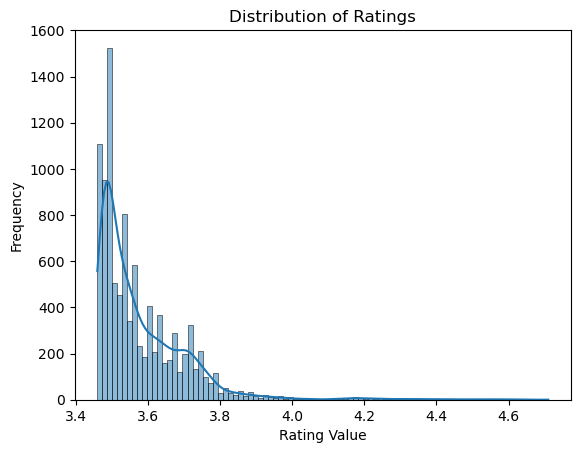

In [14]:
# Distribution for 'rating_val'
sns.histplot(restaurants['rating_val'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.show()

The distribution of ratings leans heavily to the left, indicating that many restaurants receive lower ratings. This could suggest that diners have high standards or that there are areas for improvement within the culinary scene covered by the dataset.

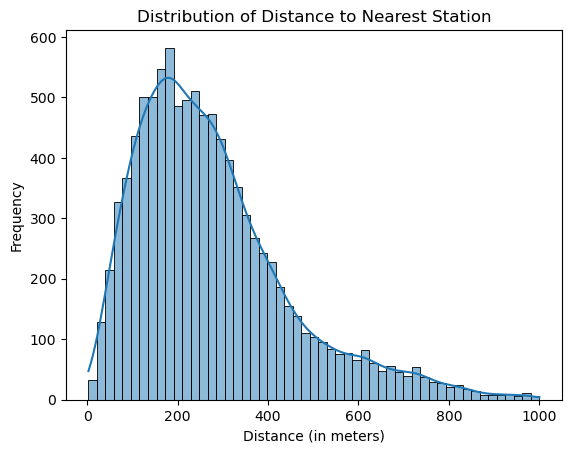

In [15]:
# Distribution for 'nearest_distance'
sns.histplot(restaurants['nearest_distance'], kde=True)
plt.title('Distribution of Distance to Nearest Station')
plt.xlabel('Distance (in meters)')
plt.ylabel('Frequency')
plt.show()

The distribution of distances to the nearest station is right-skewed. This means that most restaurants are situated quite close to a station, making them easily accessible for both locals and tourists. However, there are a few that are a bit further away, potentially offering a more secluded or unique dining experience.

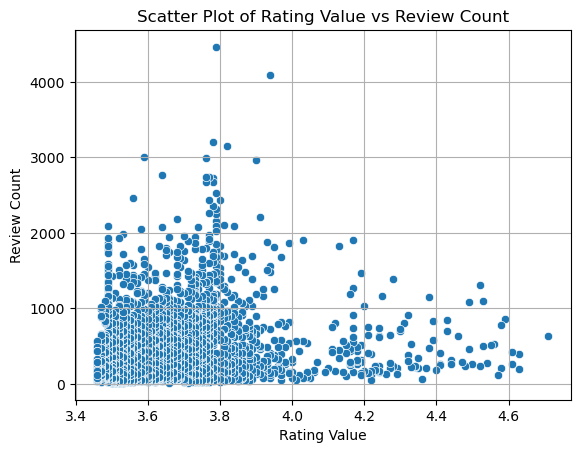

In [16]:
#Scatter Plot of Rating Value vs Review Count
sns.scatterplot(x='rating_val', y='review_cnt', data=restaurants)

# Labels and title
plt.xlabel('Rating Value')
plt.ylabel('Review Count')
plt.title('Scatter Plot of Rating Value vs Review Count')
plt.grid(True)

plt.show()

Interestingly, restaurants with ratings between 3.4 to 3.8 garner the most reviews. This suggests that establishments within this rating range often spark discussions or feedback from diners, making them hotspots for active engagement and shared experiences.

**Install the Appropriate Font**:

To properly display and read Japanese texts in your visualizations, it's essential to use a font that supports Japanese characters. If you don't already have such a font installed, we recommend downloading "Noto Sans CJK JP", which can be found [here](https://www.google.com/get/noto/).

In [17]:
import matplotlib.font_manager as fm

# Add the font file path to the font manager's ttflist
fm.fontManager.addfont('') #Please replace the file path with your own
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['font.weight'] = 'bold'

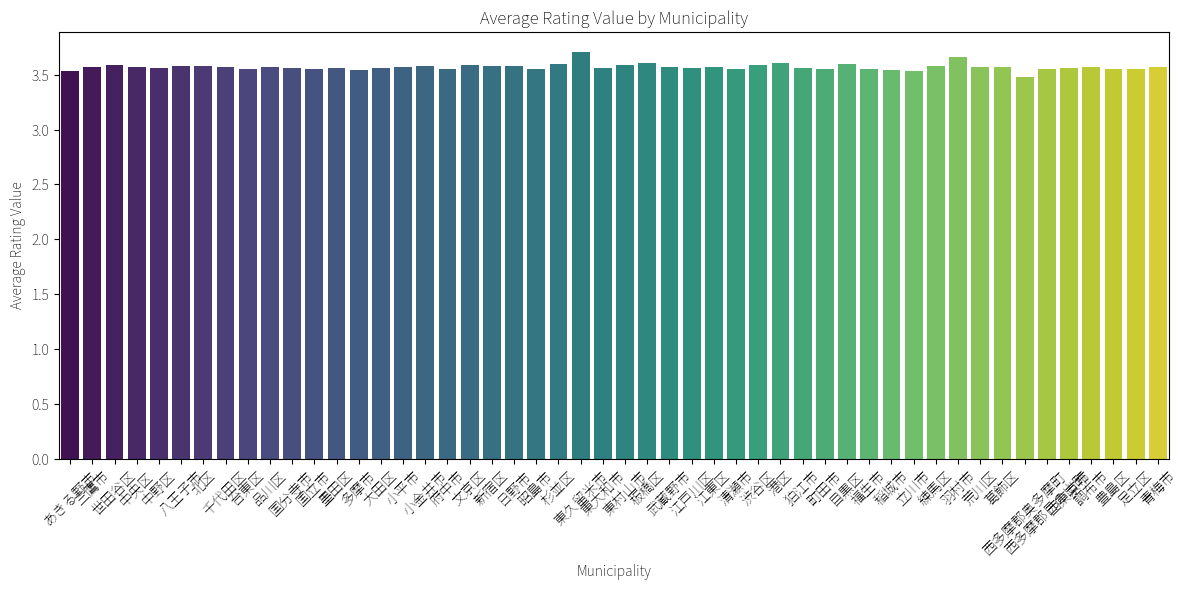

In [18]:
grouped_data = restaurants.groupby('municipalities_1').mean()['rating_val'].reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='municipalities_1', y='rating_val', data=grouped_data, palette='viridis')

plt.title('Average Rating Value by Municipality')
plt.xlabel('Municipality')
plt.ylabel('Average Rating Value')
plt.xticks(rotation=45)  # To rotate the municipality names for better visibility
plt.tight_layout()

plt.show()

When averaging the ratings of restaurants across various municipalities, the results indicate a consistent quality of dining experiences throughout. There isn't a standout municipality in terms of ratings, suggesting that regardless of location, diners in Japan can anticipate a relatively uniform standard of culinary satisfaction.

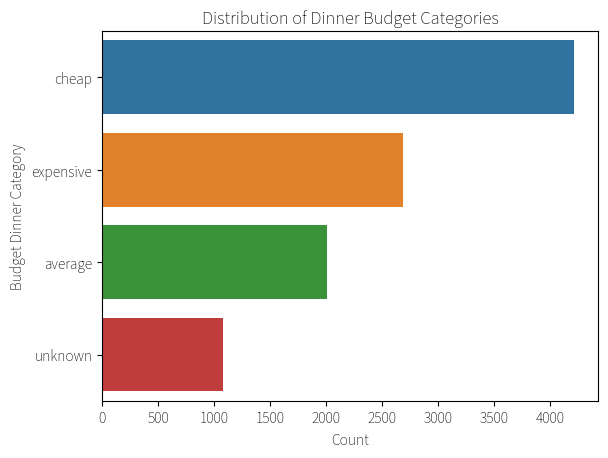

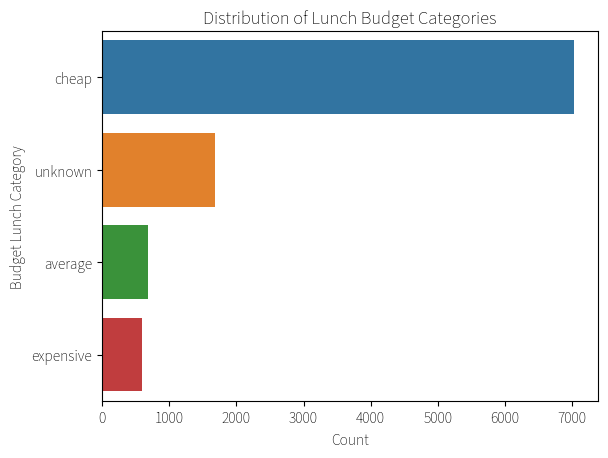

In [19]:
# Count plot for 'budget_dinner'
sns.countplot(y=restaurants['budget_dinner'], order=restaurants['budget_dinner'].value_counts().index)
plt.title('Distribution of Dinner Budget Categories')
plt.xlabel('Count')
plt.ylabel('Budget Dinner Category')
plt.show()

# Count plot for 'budget_lunch'
sns.countplot(y=restaurants['budget_lunch'], order=restaurants['budget_lunch'].value_counts().index)
plt.title('Distribution of Lunch Budget Categories')
plt.xlabel('Count')
plt.ylabel('Budget Lunch Category')
plt.show()

Analyzing the budget ranges for both lunch and dinner, we notice that most restaurants are notably affordable. With a majority falling into the cheap category, patrons can enjoy a meal at these establishments for ￥3,000 or less. This highlights the accessibility of quality dining options in Japan, even for those on a tighter budget.

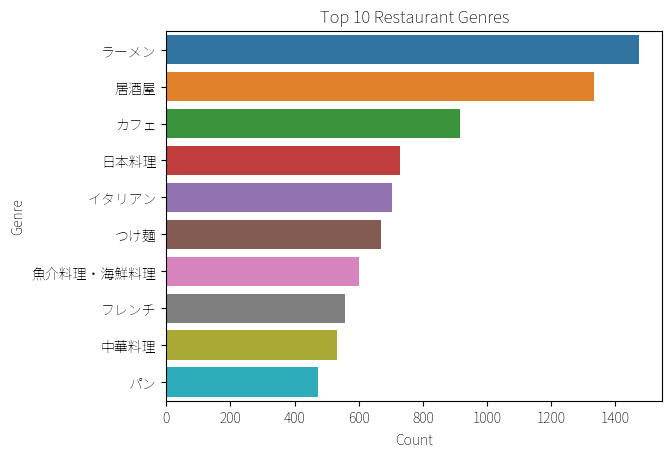

In [20]:
# For genres, since there can be multiple genres per restaurant, we might need to split them and analyze
all_genres = restaurants['genre'].str.split('、').explode().str.strip()
sns.countplot(y=all_genres, order=all_genres.value_counts().index[:10])  # Top 10 genres for visibility
plt.title('Top 10 Restaurant Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

| Japanese             | English Translation             |
|----------------------|---------------------------------|
| ラーメン (Rāmen)      | Ramen                           |
| 居酒屋 (Izakaya)      | Izakaya (Japanese Pub)          |
| カフェ (Kafe)         | Cafe                            |
| 日本料理 (Nihon ryōri)| Japanese Cuisine                |
| イタリアン (Itarian)  | Italian                         |
| つけ麺 (Tsukemen)     | Dipping Noodles                 |
| 魚介料理・海鮮料理    | Seafood Cuisine                 |
| フレンチ (Furenchi)   | French                          |
| 中華料理 (Chūka ryōri)| Chinese Cuisine                 |
| パン (Pan)            | Bread                           |

Note: Some of these terms, like "Izakaya," have no direct English translation and are often used in their original Japanese form when discussed in English contexts.

From the chart, we can identify that `ramen` and `izakaya` stand out as Japan's favorite genres. These two are not just dishes or dining styles, but integral parts of Japanese culture, making them hot favorites among locals and tourists alike.